# Advanced Methods in Data Analysis

# Ejercicio 7 Decision Trees Bagging - Grupo 8



## Integrantes
Laura Gutierrez   Código 201015209

Fernando Bautista Código 202027865

Fredi Baron       Código 202027522

Ingrid Hernández  Código 202028041

## Part 1 - DT
## Capital Bikeshare data
## Introduction

Capital Bikeshare dataset from Kaggle: data, data dictionary
Each observation represents the bikeshare rentals initiated during a given hour of a given day

In [1]:
#Librerias

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingRegressor
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
from scipy import stats
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsRegressor
# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [10]:
# read the data and set "datetime" as the index
bikes = pd.read_csv('C:/Users/ihernandez/Desktop/Guardar en Disco Duro/Modelos Avanzados 1/Talleres S2/bikeshare.csv'
                    , index_col='datetime', parse_dates=True)
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [79]:
len(bikes)

10886

In [12]:
# "count" is a method, so it's best to rename that column
bikes.rename(columns={'count':'total'}, inplace=True)
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [13]:
# create "hour" as its own feature
bikes['hour'] = bikes.index.hour
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


In [14]:
bikes.tail()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,19
2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,20
2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,21
2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,22
2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88,23


hour ranges from 0 (midnight) through 23 (11pm)
workingday is either 0 (weekend or holiday) or 1 (non-holiday weekday)

# Exercise 7.1

Run these two `groupby` statements and figure out what they tell you about the data.

In [15]:
# mean rentals for each value of "workingday"
bikes.groupby('workingday').total.mean()

workingday
0    188.506621
1    193.011873
Name: total, dtype: float64

Resumen la media del Total de alquiler de bicicletas por tipo de día de trabajo, dando como resultado que para fines de semana  el total está en un promedio de 188 y en días laborales 193.

In [16]:
# mean rentals for each value of "hour"
bikes.groupby('hour').total.mean()

hour
0      55.138462
1      33.859031
2      22.899554
3      11.757506
4       6.407240
5      19.767699
6      76.259341
7     213.116484
8     362.769231
9     221.780220
10    175.092308
11    210.674725
12    256.508772
13    257.787281
14    243.442982
15    254.298246
16    316.372807
17    468.765351
18    430.859649
19    315.278509
20    228.517544
21    173.370614
22    133.576754
23     89.508772
Name: total, dtype: float64

Describe la media del valor total por rango de hora.

# Exercise 7.2

Run this plotting code, and make sure you understand the output. Then, separate this plot into two separate plots conditioned on "workingday". (In other words, one plot should display the hourly trend for "workingday=0", and the other should display the hourly trend for "workingday=1".)

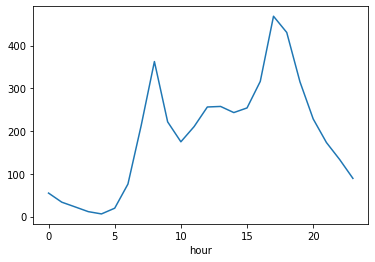

In [17]:
# mean rentals for each value of "hour"
bikes.groupby('hour').total.mean().plot()

Plot for workingday == 0 and workingday == 1

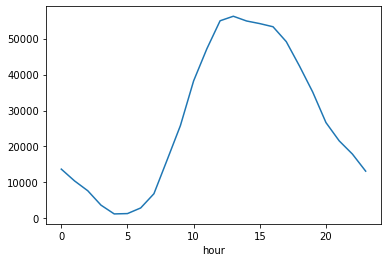

In [27]:
# hourly rental trend for "workingday=0"
fin_semana=bikes[(bikes['workingday'] == 0)]
fin_semana.groupby('hour').total.sum().plot()

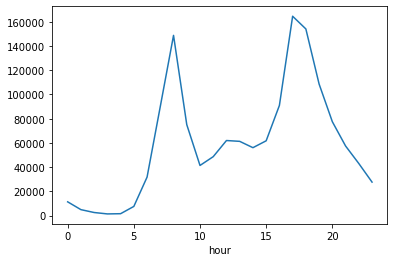

In [26]:
# hourly rental trend for "workingday=1"

entre_semana=bikes[(bikes['workingday'] == 1)]
entre_semana.groupby('hour').total.sum().plot()

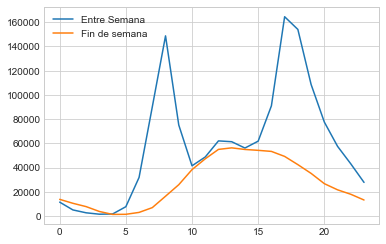

In [43]:
# combine the two plots

plt.plot (entre_semana.groupby('hour').total.sum())+ plt.plot (fin_semana.groupby('hour').total.sum())
plt.gca().legend(('Entre Semana','Fin de semana'))
plt.show()

## Write about your findings

Se observa que el número de alquiler entre semana tiene es más alto y tiene dos picos en la mañana y tarde, horarios que parecen coincidir con inicio y salida de horarios laborales.

# Exercise 7.3

Fit a linear regression model to the entire dataset, using "total" as the response and "hour" and "workingday" as the only features. Then, print the coefficients and interpret them. What are the limitations of linear regression in this instance?

In [91]:
dataX =bikes[["workingday","hour"]]
X_train = np.array(dataX)
y_train = bikes['total'].values
 
# Creamos el objeto de Regresión Linear
regr = linear_model.LinearRegression()
 
# Entrenamos nuestro modelo
regr.fit(X_train, y_train)
 
# Hacemos las predicciones que en definitiva una línea (en este caso, al ser 2D)
y_pred = regr.predict(X_train)
 
# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coefficients: \n', regr.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', regr.intercept_)
# Error Cuadrado Medio
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_pred))
# Puntaje de Varianza. El mejor puntaje es un 1.0
print('Variance score: %.2f' % r2_score(y_train, y_pred))


Coefficients: 
 [ 4.07248627 10.49206282]
Independent term: 
 67.70595026191596
Mean squared error: 27541.26
Variance score: 0.16


In [194]:
# División de los datos en train y test
# ==============================================================================
X = bikes[['workingday','hour']]
y = bikes['total']

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1024,
                                        shuffle      = True
                                    )

In [195]:
# Creación del modelo utilizando matrices como en scikitlearn
# ==============================================================================
# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.162
Model:                            OLS   Adj. R-squared:                  0.162
Method:                 Least Squares   F-statistic:                     841.6
Date:                Mon, 19 Jul 2021   Prob (F-statistic):               0.00
Time:                        16:47:29   Log-Likelihood:                -56910.
No. Observations:                8708   AIC:                         1.138e+05
Df Residuals:                    8705   BIC:                         1.138e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         66.6281      4.335     15.368      0.0

In [196]:
# Diagnóstico errores (residuos) de las predicciones de entrenamiento
# ==============================================================================
y_train = y_train.flatten()
prediccion_train = modelo.predict(exog = X_train)
residuos_train   = prediccion_train - y_train

In [197]:
# Normalidad de los residuos Shapiro-Wilk test
# ==============================================================================
shapiro_test = stats.shapiro(residuos_train)
shapiro_test

ShapiroResult(statistic=0.9016624093055725, pvalue=0.0)

In [198]:
# Normalidad de los residuos D'Agostino's K-squared test
# ==============================================================================
k2, p_value = stats.normaltest(residuos_train)
print(f"Estadítico= {k2}, p-value = {p_value}")

Estadítico= 1843.6036695395242, p-value = 0.0


In [199]:
# Error de test del modelo 
# ==============================================================================
X_test = sm.add_constant(X_test, prepend=True)
predicciones = modelo.predict(exog = X_test)
rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print("")
print(f"El error (rmse) de test es: {rmse}")


El error (rmse) de test es: 162.80430408575538


## Limitaciones modelo líneal
Se evidencia un error cuadrático medio muy grande, la explicación de la variable dependiente no es buena ya que las variables hora y tipo de día no dan suficiente información para predecir el número de alquier. Adicional no se cumplen los supuestos de normalidad para los residuos.

# Exercice 7.4

Create a Decision Tree to forecast "total" by manually iterating over the features "hour" and "workingday". The algorithm must at least have 6 end nodes.

In [109]:
models = {'lr': LinearRegression(),
          'dt': DecisionTreeRegressor(),
          'nb': GaussianNB(),
          'kn': KNeighborsRegressor()}

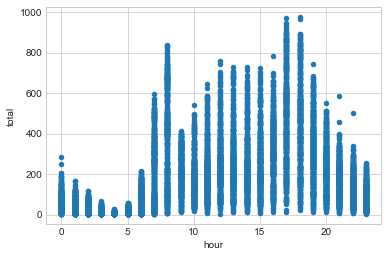

In [149]:

# scatter plot of Years versus Hits colored by Salary
bikes.plot(kind='scatter', x='hour', y='total')

In [166]:
feature_cols=bikes[["workingday","hour"]]
feature_cols.columns

Index(['workingday', 'hour'], dtype='object')

In [172]:
# define X and y
X = feature_cols
y = bikes['total']

In [173]:
max_depth = 6
num_pct = 10
max_features = None
min_gain=0.001

In [174]:
j = 1
print(X.columns[j])

hour


In [175]:
# Split the variable in num_ctp points
splits = np.percentile(X.iloc[:, j], np.arange(0, 100, 100.0 / num_pct).tolist())

In [176]:
# Only unique values for filter binary and few unique values features
splits = np.unique(splits)
splits

array([ 0.,  2.,  4.,  7.,  9., 12., 14., 16., 19., 21.])

In [177]:
k = 5

# Exercise 7.5

Train a Decision Tree using scikit-learn. Comment about the performance of the models.

In [200]:
X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1024,
                                        shuffle      = True
                                    )

In [201]:
arbol_1 = DecisionTreeRegressor(random_state=0)
cross_val_score(arbol_1, X_train, y_train, cv=10)

array([0.64455709, 0.65095703, 0.6770721 , 0.68284171, 0.67744717,
       0.63292566, 0.60479641, 0.65304213, 0.64563346, 0.6367629 ])

In [202]:

# fit and predict
arbol_1.fit(X_train, y_train)
y_pred = arbol_1.predict(X_test)
y_pred

array([150.21100917, 334.11304348, 357.36842105, ..., 334.11304348,
       139.72244898, 325.05172414])

In [203]:
# calculate RMSE
np.sqrt(mean_squared_error(y_test, y_pred))

104.73427704535668

# Part 2 - Bagging

## Mashable news stories analysis

Predicting if a news story is going to be popular

In [2]:
df = pd.read_csv('C:/Users/ihernandez/Desktop/Guardar en Disco Duro/Modelos Avanzados 1/Talleres S2/mashable.csv', index_col=0)
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,Popular
0,http://mashable.com/2014/12/10/cia-torture-rep...,28.0,9.0,188.0,0.732620,1.0,0.844262,5.0,1.0,1.0,...,0.200000,0.80,-0.487500,-0.60,-0.250000,0.9,0.8,0.4,0.8,1
1,http://mashable.com/2013/10/18/bitlock-kicksta...,447.0,7.0,297.0,0.653199,1.0,0.815789,9.0,4.0,1.0,...,0.160000,0.50,-0.135340,-0.40,-0.050000,0.1,-0.1,0.4,0.1,0
2,http://mashable.com/2013/07/24/google-glass-po...,533.0,11.0,181.0,0.660377,1.0,0.775701,4.0,3.0,1.0,...,0.136364,1.00,0.000000,0.00,0.000000,0.3,1.0,0.2,1.0,0
3,http://mashable.com/2013/11/21/these-are-the-m...,413.0,12.0,781.0,0.497409,1.0,0.677350,10.0,3.0,1.0,...,0.100000,1.00,-0.195701,-0.40,-0.071429,0.0,0.0,0.5,0.0,0
4,http://mashable.com/2014/02/11/parking-ticket-...,331.0,8.0,177.0,0.685714,1.0,0.830357,3.0,2.0,1.0,...,0.100000,0.55,-0.175000,-0.25,-0.100000,0.0,0.0,0.5,0.0,0


In [3]:
df.shape

(6000, 61)

In [4]:
X = df.drop(['url', 'Popular'], axis=1)
y = df['Popular']

In [5]:
y.mean()

0.5

In [5]:
# train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Exercise 7.6

Estimate a Decision Tree Classifier and a Logistic Regression

Evaluate using the following metrics:
* Accuracy
* F1-Score

In [6]:
# list of values to try for max_depth
max_depth_range = range(1, 10)

# list to store the average RMSE for each value of max_depth
accuracy_scores = []

## Decision Tree Classifier 
for depth in max_depth_range:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=1)
    accuracy_scores.append(cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy').mean())

Text(0, 0.5, 'Accuracy')

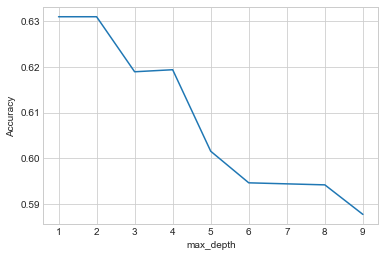

In [7]:
# plot max_depth (x-axis) versus RMSE (y-axis)
plt.plot(max_depth_range, accuracy_scores)
plt.xlabel('max_depth')
plt.ylabel('Accuracy')

In [8]:
# show the best accuracy and the corresponding max_depth
sorted(zip(accuracy_scores, max_depth_range))[::-1][0]

(0.6308888888888888, 2)

In [9]:
# max_depth=2 was best, so fit a tree using that parameter
clf = DecisionTreeClassifier(max_depth=2, random_state=1)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=1)

In [10]:
# compute feature importances (top 10)
feature_cols = X.columns[X.columns.str.startswith('C') == False]

pd.DataFrame({'feature':feature_cols, 'importance':clf.feature_importances_}).sort_values('importance',ascending=False).head(10)

,feature,importance
26,kw_avg_avg,0.900096
25,kw_max_avg,0.099904
0,timedelta,0.000000
31,weekday_is_tuesday,0.000000
33,weekday_is_thursday,0.000000
34,weekday_is_friday,0.000000
35,weekday_is_saturday,0.000000
36,weekday_is_sunday,0.000000
37,is_weekend,0.000000
38,LDA_00,0.000000


In [11]:
# predict 
y_pred_1 = clf.predict(X_test)
y_pred_1=pd.DataFrame(y_pred_1)

In [12]:

metrics.f1_score(y_pred_1, y_test), metrics.accuracy_score(y_pred_1, y_test)

(0.6448598130841121, 0.6453333333333333)

In [13]:
### Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [14]:
y_pred_logit = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.61


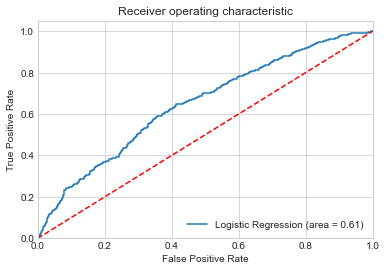

In [15]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [16]:
metrics.f1_score(y_pred_logit, y_test), metrics.accuracy_score(y_pred_logit, y_test)

(0.6110363391655451, 0.6146666666666667)

# Exercise 7.7

Estimate 300 bagged samples

Estimate the following set of classifiers:

* 100 Decision Trees where max_depth=None
* 100 Decision Trees where max_depth=2
* 100 Logistic Regressions

In [42]:
##Bagged 300 samples

# set a seed for reproducibility
seed = np.random.seed(1024)
n_samples = X_train.shape[0]
n_B = 300

# create bootstrap samples (will be used to select rows from the DataFrame)
samples = [np.random.choice(a=n_samples, size=n_samples, replace=True) for _ in range(1, n_B +1 )]

In [60]:

clf_bag = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=n_B,  
                          bootstrap=True, oob_score=True, random_state=1)

In [61]:
clf_bag.fit(X_train, y_train)
y_pred_bagg = clf_bag.predict(X_test)
metrics.f1_score(y_pred_bagg, y_test), metrics.accuracy_score(y_pred_bagg, y_test)

(0.6481848184818482, 0.6446666666666667)

In [17]:
## 100 Decision Trees where max_depth=None

# set a seed for reproducibility
n_estimators = 100
np.random.seed(1024)

n_samples = X_train.shape[0]

# create bootstrap samples (will be used to select rows from the DataFrame)
samples = [np.random.choice(a=n_samples, size=n_samples, replace=True) for _ in range(n_estimators)]

In [18]:
np.random.seed(1024) 
seeds = np.random.randint(1, 100, size=n_estimators)

trees = {}
for i in range(n_estimators):
    trees[i] = DecisionTreeClassifier(max_features="sqrt", max_depth=None, random_state=seeds[i])
    trees[i].fit(X_train.iloc[samples[i]], y_train.iloc[samples[i]])


In [23]:
# Predict 
y_pred_df = pd.DataFrame(index=X_test.index, columns=list(range(n_estimators)))
for i in range(n_estimators):
    y_pred_df.iloc[:, i] = trees[i].predict(X_test)

y_pred_df.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
1483,0,0,0,1,0,0,1,0,1,0,...,1,0,1,1,1,0,1,1,1,1
2185,1,0,1,1,0,0,1,1,0,1,...,1,0,0,0,1,1,0,1,1,1
2520,1,1,0,1,1,0,1,1,1,1,...,1,0,0,1,0,0,1,0,1,0
3721,1,0,0,0,1,1,1,1,0,0,...,1,1,1,1,0,0,0,1,1,1
3727,1,0,0,0,1,1,0,0,1,0,...,0,1,1,1,0,0,1,0,1,0


In [27]:

y_pred_df.sum(axis=1)[:10]
y_pred_2 = (y_pred_df.sum(axis=1) >= (n_estimators / 2)).astype(np.int)


metrics.f1_score(y_pred_2, y_test)

0.6548556430446194

In [28]:
metrics.accuracy_score(y_pred_2, y_test)

0.6493333333333333

In [29]:
## 100 Decision Trees where max_depth=2

np.random.seed(1024) 
seeds = np.random.randint(1, 100, size=n_estimators)

trees = {}
for i in range(n_estimators):
    trees[i] = DecisionTreeClassifier(max_features="sqrt", max_depth=2, random_state=seeds[i])
    trees[i].fit(X_train.iloc[samples[i]], y_train.iloc[samples[i]])

In [30]:
# Predict 
y_pred_df = pd.DataFrame(index=X_test.index, columns=list(range(n_estimators)))
for i in range(n_estimators):
    y_pred_df.iloc[:, i] = trees[i].predict(X_test)

y_pred_df.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
1483,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0,0,1,0,0
2185,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,0,1,1,0
2520,1,0,1,1,1,1,0,0,1,0,...,1,1,1,1,1,0,1,1,1,0
3721,1,1,1,1,1,1,1,1,0,0,...,1,1,1,1,1,1,1,1,0,1
3727,0,0,0,1,0,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0


In [31]:

y_pred_df.sum(axis=1)[:10]
y_pred_3 = (y_pred_df.sum(axis=1) >= (n_estimators / 2)).astype(np.int)

metrics.f1_score(y_pred_3, y_test)

0.6666666666666666

In [32]:
metrics.accuracy_score(y_pred_3, y_test)

0.6653333333333333

In [33]:
## 100 Logistic Regressions
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [34]:
np.random.seed(1024) 
seeds = np.random.randint(1, 100, size=n_estimators)

logit = {}
for i in range(n_estimators):
    logit[i] = logreg = LogisticRegression()
    logit[i].fit(X_train.iloc[samples[i]], y_train.iloc[samples[i]])

In [35]:
# Predict 
y_pred_df = pd.DataFrame(index=X_test.index, columns=list(range(n_estimators)))
for i in range(n_estimators):
    y_pred_df.iloc[:, i] = logit[i].predict(X_test)

y_pred_df.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
1483,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2185,1,0,0,1,1,1,1,0,1,1,...,1,0,1,1,1,0,0,1,1,0
2520,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3721,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3727,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [37]:
y_pred_df.sum(axis=1)[:10]
y_pred_4 = (y_pred_df.sum(axis=1) >= (n_estimators / 2)).astype(np.int)

metrics.f1_score(y_pred_4, y_test)

0.61455525606469

In [38]:
metrics.accuracy_score(y_pred_4, y_test)

0.6186666666666667

# Exercise 7.8

Ensemble using majority voting

Evaluate using the following metrics:
* Accuracy
* F1-Score

In [45]:
# set a seed for reproducibility
n_estimators = 100
np.random.seed(1024)

n_samples = X_train.shape[0]

# create bootstrap samples (will be used to select rows from the DataFrame)
samples = [np.random.choice(a=n_samples, size=n_samples, replace=True) for _ in range(n_estimators)]

In [46]:

seeds = np.random.randint(1, 10000, size=n_estimators)

trees_vo = {}
for i in range(n_estimators):
    trees_vo[i] = DecisionTreeClassifier(max_features="sqrt", max_depth=None, random_state=seeds[i])
    trees_vo[i].fit(X_train.iloc[samples[i]], y_train.iloc[samples[i]])

In [47]:
# Predict 
y_pred_df = pd.DataFrame(index=X_test.index, columns=list(range(n_estimators)))
for i in range(n_estimators):
    y_pred_df.iloc[:, i] = trees_vo[i].predict(X_test)

y_pred_df.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
1483,1,1,1,0,1,1,1,0,1,0,...,1,1,1,1,0,1,1,1,1,1
2185,0,0,1,0,1,1,1,0,0,0,...,1,0,0,1,1,0,1,1,1,1
2520,0,0,0,0,0,1,0,0,0,1,...,1,1,0,1,0,1,0,0,1,0
3721,0,1,1,0,1,1,1,0,1,1,...,1,1,0,1,0,1,0,1,1,1
3727,0,1,0,1,0,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0


In [50]:
y_pred_5 = (y_pred_df.sum(axis=1) >= (n_estimators / 2)).astype(np.int)

metrics.f1_score(y_pred_5, y_test)

0.6553966189856957

In [51]:
metrics.accuracy_score(y_pred_5, y_test)

0.6466666666666666

# Exercise 7.9

Estimate the probability as %models that predict positive

Modify the probability threshold and select the one that maximizes the F1-Score

In [59]:
## 100 Decision Trees where max_depth=None

y_pred_2.value_counts().to_frame('count').assign(percentage = lambda x: x/x.sum())

,count,percentage
1,768,0.512
0,732,0.488


In [58]:
## 100 Decision Trees where max_depth=2

y_pred_3.value_counts().to_frame('count').assign(percentage = lambda x: x/x.sum())

,count,percentage
1,750,0.5
0,750,0.5


In [57]:
## 100 Logistic Regressions

y_pred_4.value_counts().to_frame('count').assign(percentage = lambda x: x/x.sum())

,count,percentage
0,772,0.514667
1,728,0.485333


In [56]:
## Majority voting

y_pred_5.value_counts().to_frame('count').assign(percentage = lambda x: x/x.sum())

,count,percentage
1,782,0.521333
0,718,0.478667


# Exercise 7.10

Ensemble using weighted voting using the oob_error

Evaluate using the following metrics:
* Accuracy
* F1-Score

In [117]:
# baggin
errors_1 = np.zeros(clf_bag.n_estimators)
y_pred_all_1 = np.zeros((X_test.shape[0], clf_bag.n_estimators))

for i in range(clf_bag.n_estimators):
    oob_sample = ~clf_bag.estimators_samples_[i]
    y_pred_ = clf_bag.estimators_[i].predict(X_train.values[oob_sample])
    errors_a[i] = metrics.accuracy_score(y_pred_, y_train.values[oob_sample])
    y_pred_all_1[:, i] = clf_bag.estimators_[i].predict(X_test)
    
threshold = 0.5
alpha = (1 - errors_1) / (1 - errors_1).sum()
y_pred_1 = (np.sum(y_pred_all_1 * alpha, axis=1) >= threshold).astype(np.int)
y_pred_1 = pd.DataFrame(y_pred_bagg)

In [118]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_1))
print("F1 score:",metrics.f1_score(y_test, y_pred_1))

Accuracy: 0.6446666666666667
F1 score: 0.6481848184818482


In [125]:
## 100 Decision Trees where max_depth=None

seed=np.random.seed(1024)
n_samples = X_train.shape[0]
n_B = 100

# grow each tree deep
clf2 = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=None, random_state=123), 
                        n_estimators=n_B, bootstrap=True,
                        random_state=seed, n_jobs=-1, oob_score=True)

clf2.fit(X_train, y_train)
y_pred_2 = clf2.predict(X_test)


# samples models
errors_2 = np.zeros(clf2.n_estimators)
y_pred_all_2 = np.zeros((X_test.shape[0], clf2.n_estimators))

for i in range(clf2.n_estimators):
    oob_sample = ~clf2.estimators_samples_[i]
    y_pred_ = clf2.estimators_[i].predict(X_train.values[oob_sample])
    errors_2[i] = metrics.accuracy_score(y_pred_, y_train.values[oob_sample])
    y_pred_all_2[:, i] = clf2.estimators_[i].predict(X_test)
    
threshold = 0.5
alpha = (1 - errors_2) / (1 - errors_2).sum()
y_pred_2 = (np.sum(y_pred_all_2 * alpha, axis=1) >= threshold).astype(np.int)
y_pred_2 = pd.DataFrame(y_pred_2)

In [126]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_2))
print("F1 score:",metrics.f1_score(y_test, y_pred_2))

Accuracy: 0.652
F1 score: 0.65748031496063


In [131]:
## 100 Decision Trees where max_depth=2

seed=np.random.seed(1024)
n_samples = X_train.shape[0]
n_B = 100

# grow each tree deep
clf3 = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=2, random_state=123), 
                        n_estimators=n_B, bootstrap=True,
                        random_state=seed, n_jobs=-1, oob_score=True)

clf3.fit(X_train, y_train)
y_pred_3 = clf3.predict(X_test)


# samples models
errors_3 = np.zeros(clf3.n_estimators)
y_pred_all_3 = np.zeros((X_test.shape[0], clf3.n_estimators))

for i in range(clf3.n_estimators):
    oob_sample = ~clf3.estimators_samples_[i]
    y_pred_ = clf3.estimators_[i].predict(X_train.values[oob_sample])
    errors_3[i] = metrics.accuracy_score(y_pred_, y_train.values[oob_sample])
    y_pred_all_3[:, i] = clf3.estimators_[i].predict(X_test)
    
threshold = 0.5
alpha = (1 - errors_3) / (1 - errors_3).sum()
y_pred_3 = (np.sum(y_pred_all_3 * alpha, axis=1) >= threshold).astype(np.int)
y_pred_3 = pd.DataFrame(y_pred_3)

In [132]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_3))
print("F1 score:",metrics.f1_score(y_test, y_pred_3))

Accuracy: 0.6453333333333333
F1 score: 0.6448598130841121


In [136]:
# 100 logistic regression

seed=np.random.seed(1024)
n_samples = X_train.shape[0]
n_B = 100

# grow each tree deep
clf4 = BaggingClassifier(base_estimator=LogisticRegression(), 
                        n_estimators=n_B, bootstrap=True,
                        random_state=seed, n_jobs=-1, oob_score=True)

clf4.fit(X_train, y_train)
y_pred_4 = clf4.predict(X_test)

# samples models
errors_4 = np.zeros(clf4.n_estimators)
y_pred_all_4 = np.zeros((X_test.shape[0], clf4.n_estimators))

for i in range(clf4.n_estimators):
    oob_sample = ~clf4.estimators_samples_[i]
    y_pred_ = clf4.estimators_[i].predict(X_train.values[oob_sample])
    errors_4[i] = metrics.accuracy_score(y_pred_, y_train.values[oob_sample])
    y_pred_all_4[:, i] = clf4.estimators_[i].predict(X_test)
    
threshold = 0.5
alpha = (1 - errors_4) / (1 - errors_4).sum()
y_pred_d = (np.sum(y_pred_all_4 * alpha, axis=1) >= threshold).astype(np.int)
y_pred_d = pd.DataFrame(y_pred_4)

In [137]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_4))
print("F1 score:",metrics.f1_score(y_test, y_pred_4))


Accuracy: 0.6186666666666667
F1 score: 0.6135135135135135


# Exercise 7.11

Estimate the probability of the weighted voting

Modify the probability threshold and select the one that maximizes the F1-Score

threshold: 37 %
f1_score: 0.7085106382978723


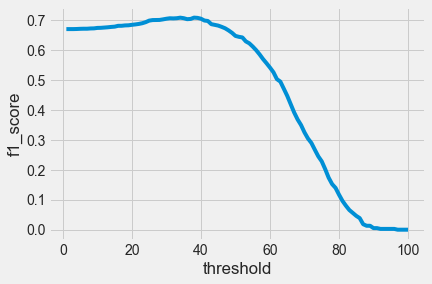

In [139]:
##Bagged 300 samples

# threshold selection process
threshold = 0
f1_score = []

for threshold in range(1,101,1):
    alpha = (1 - errors_1) / (1 - errors_1).sum()
    y_pred_1 = (np.sum(y_pred_all_1 * alpha, axis=1) >= threshold/100).astype(np.int)
    y_pred = pd.DataFrame(y_pred_1)
    f1_score.append(metrics.f1_score(y_test, y_pred))

# plot threshold (x-axis) versus f1_score (y-axis)
plt.style.use('fivethirtyeight')
plt.plot(range(1,101), f1_score)
plt.xlabel('threshold')
plt.ylabel('f1_score')

# max f1_score and threshold
print("threshold:",f1_score.index(max(f1_score)),"%")
print("f1_score:", max(f1_score))

threshold: 31 %
f1_score: 0.707938092860709


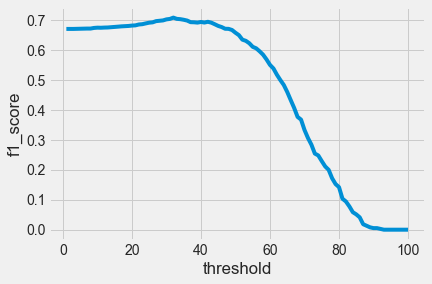

In [127]:
## 100 Decision Trees where max_depth=None

# threshold selection process
threshold = 0
f1_score = []

for threshold in range(1,101,1):
    alpha = (1 - errors_2) / (1 - errors_2).sum()
    y_pred_2 = (np.sum(y_pred_all_2 * alpha, axis=1) >= threshold/100).astype(np.int)
    y_pred = pd.DataFrame(y_pred_2)
    f1_score.append(metrics.f1_score(y_test, y_pred))

# plot threshold (x-axis) versus f1_score (y-axis)
plt.style.use('fivethirtyeight')
plt.plot(range(1,101), f1_score)
plt.xlabel('threshold')
plt.ylabel('f1_score')

# max f1_score and threshold
print("threshold:",f1_score.index(max(f1_score)),"%")
print("f1_score:", max(f1_score))

threshold: 0 %
f1_score: 0.7024539877300613


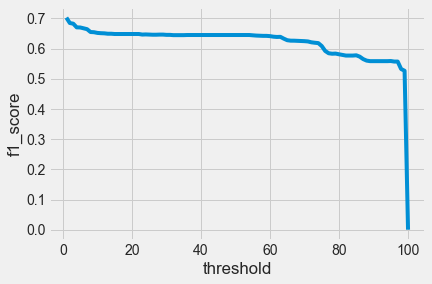

In [133]:
## 100 Decision Trees where max_depth=2

# threshold selection process
threshold = 0
f1_score = []

for threshold in range(1,101,1):
    alpha = (1 - errors_3) / (1 - errors_3).sum()
    y_pred_3 = (np.sum(y_pred_all_3 * alpha, axis=1) >= threshold/100).astype(np.int)
    y_pred = pd.DataFrame(y_pred_3)
    f1_score.append(metrics.f1_score(y_test, y_pred))

# plot threshold (x-axis) versus f1_score (y-axis)
plt.style.use('fivethirtyeight')
plt.plot(range(1,101), f1_score)
plt.xlabel('threshold')
plt.ylabel('f1_score')

# max f1_score and threshold
print("threshold:",f1_score.index(max(f1_score)),"%")
print("f1_score:", max(f1_score))

# Exercise 7.12

Estimate a logistic regression using as input the estimated classifiers

Modify the probability threshold such that maximizes the F1-Score

threshold: 0 %
f1_score: 0.6616279069767442


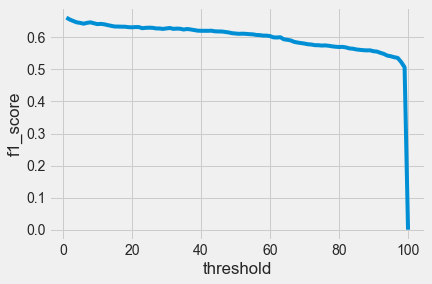

In [138]:
# threshold selection process
threshold = 0
f1_score = []

for threshold in range(1,101,1):
    alpha = (1 - errors_4) / (1 - errors_4).sum()
    y_pred_4 = (np.sum(y_pred_all_4 * alpha, axis=1) >= threshold/100).astype(np.int)
    y_pred = pd.DataFrame(y_pred_4)
    f1_score.append(metrics.f1_score(y_test, y_pred))

# plot threshold (x-axis) versus f1_score (y-axis)
plt.style.use('fivethirtyeight')
plt.plot(range(1,101), f1_score)
plt.xlabel('threshold')
plt.ylabel('f1_score')

# max f1_score and threshold
print("threshold:",f1_score.index(max(f1_score)),"%")
print("f1_score:", max(f1_score))